### Recognition problem (Принятие решений по прецендентности. Задача распознавания)

In [1]:
import glob, os
from skimage.io import imread
from skimage.morphology import square,ball,diamond

from scipy import ndimage
from skimage import morphology as mph

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from skimage import data, io, filters
import warnings
warnings.filterwarnings('ignore')

from PIL import Image

def plot(ax, image):
    ax.imshow(image, cmap=cm.binary)
   

In [3]:
path = "C://Users//PC//PycharmProjects//bsu//artificial-intelligence//lab2//pic2//"


dataset_file_name = []
dataset = []
class_name = ['canvas', 'cushion', 'linseeds','sand','seat', 'stone' ]



os.chdir(path)
for file in glob.glob("*.png"):
    dataset_file_name.append(file) 

for name in dataset_file_name:
    dataset.append(np.array(Image.open( path+ name)))
    
    
    
n =   len(dataset)  
target = [-1] * n
feat = [-1] * n


for i in range(len(dataset_file_name)):  
    for j in range(len(class_name)):
        if class_name[j] in dataset_file_name[i]:
            target[i] = j


### set the number of classes p and sample size N:

In [4]:
p = len(class_name)
n = len(dataset) 


### dataset

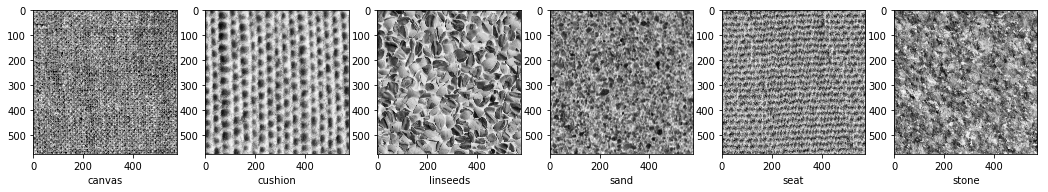

In [5]:
fig, (ax0, ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=1, ncols=6, figsize=(18, 9))

plot(ax0, dataset[1])
ax0.set_xlabel(class_name[0])
#count,bins,hist = plt.hist(dataset[i].flatten(),bins = 100, alpha = 0.5)

plot(ax1, dataset[33])
ax1.set_xlabel(class_name[1])
plot(ax2, dataset[63])
ax2.set_xlabel(class_name[2])

plot(ax3, dataset[93])
ax3.set_xlabel(class_name[3])
plot(ax4, dataset[123])
ax4.set_xlabel(class_name[4])
plot(ax5, dataset[153])
ax5.set_xlabel(class_name[5])

plt.show()

### features

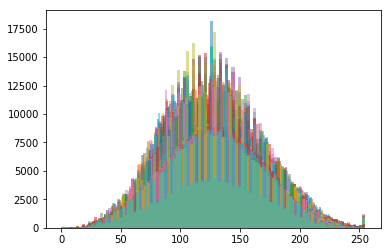

In [6]:
for i in range(n):
    count,bins,hist = plt.hist(dataset[i].flatten(),bins = 100, alpha = 0.5)
    feat[i] = count


### split into 2 parts

In [7]:
X_test = [ feat[i] for i in range(n) if i % 2 == 0 ]
X_param = [ feat[i] for i in range(n) if i % 2 != 0 ]

In [8]:
test_index = [i for i in range(n) if i % 2 == 0]
param_index = [i for i in range(n) if i % 2 != 0 ]

In [9]:
yt = [target[i] for i in range(n) if i % 2 == 0 ]
yp =[target[i] for i in range(n) if i % 2 != 0 ]

n_, m = len(X_test), len(X_param)

ni = [list(yt).count(i) for i in range(p)]
mi = [list(yp).count(i) for i in range(p)]
print('classes:', [i for i in range(p)])
print('test:\t', ni)
print('param:\t', mi)

classes: [0, 1, 2, 3, 4, 5]
test:	 [15, 15, 15, 15, 15, 15]
param:	 [15, 15, 15, 15, 15, 15]


### training

In [10]:

from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd


D = pd.DataFrame(distance_matrix(X_test, X_param, p = 0.2))
B = np.zeros((n_, p))

yp = pd.DataFrame(yp)

for row in range(n_):
    for cls in range(p):
        B[row][cls] = D[row][yp[0] == cls].mean()
        
predicted_classes = B.argmin(axis=1)
quality = (yt == predicted_classes).mean()
print('quality: {}%'.format(quality * 100))

quality: 96.66666666666667%


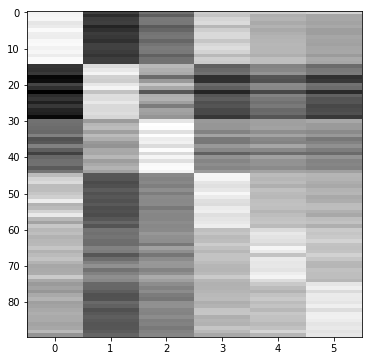

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(B, cmap='binary', interpolation='nearest', aspect = 'auto')
plt.show()

### distance matrix

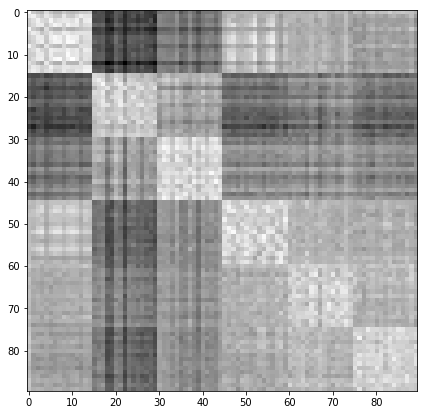

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(D, cmap='binary', interpolation='nearest', aspect = 'auto')
plt.show()

### result

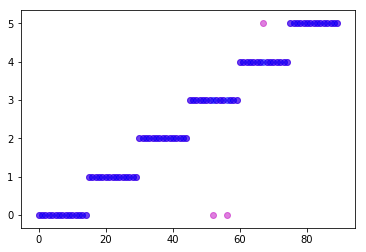

In [13]:
plt.scatter(range(m),predicted_classes,alpha = 0.5 ,color = 'm')
plt.scatter(range(m), yt,alpha = 0.5, color = 'blue')
plt.show()